#### https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Download dataset from above link, you will predict salaries for Data Science Roles


# Regression Assignment 

In [480]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
pd.options.display.max_rows=100
pd.options.display.max_columns=100
warnings.filterwarnings('ignore')

In [481]:
df = pd.read_csv(r"A:\datasets\ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [482]:
df.shape

(607, 12)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [484]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [485]:
print(df.shape)
df.drop(['Unnamed: 0','salary','salary_currency','employment_type'],axis=1,inplace=True)
print(df.shape)

(607, 12)
(607, 8)


In [486]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

work_year
2022    318
2021    217
2020     72
Name: work_year, dtype: int64

experience_level
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
Data Analytics Manager                        7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Le

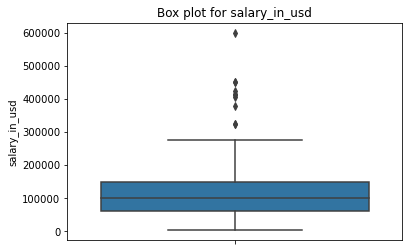

In [487]:
sns.boxplot(y=df['salary_in_usd'])
plt.title('Box plot for salary_in_usd')
plt.show()

#### Inference: This column as outliers so we need to perform outlier imputation

In [488]:
iqr = df['salary_in_usd'].quantile(0.75) - df['salary_in_usd'].quantile(0.25)
lower_range = df['salary_in_usd'].quantile(0.25) - (1.5 * iqr)
higher_range  = df['salary_in_usd'].quantile(0.75) + (1.5 * iqr)
replace_lower_range = df['salary_in_usd'].quantile(0.25)
replace_higher_range = df['salary_in_usd'].quantile(0.75)
df['salary_in_usd'] = pd.DataFrame(np.where(df['salary_in_usd']<lower_range, replace_lower_range, df['salary_in_usd']))
df['salary_in_usd'] = pd.DataFrame(np.where(df['salary_in_usd']>higher_range, replace_higher_range, df['salary_in_usd']))


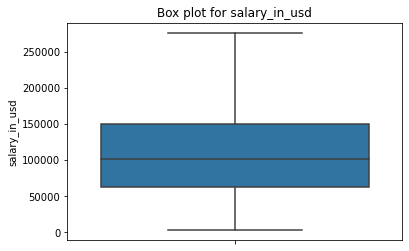

In [489]:
sns.boxplot(y=df['salary_in_usd'])
plt.title('Box plot for salary_in_usd')
plt.show()

#### Inference: Outliers have been imputed successfully

In [490]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['experience_level', 'job_title', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')

In [491]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())

experience_level
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
Data Analytics Manager                        7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Applied Data Scientist          

In [492]:
en_df = df.copy(deep=True)
en_df['experience_level'] = en_df['experience_level'].map({'EN':1, 'MI':2, 'SE':3, 'EX':4})
en_df['company_size'] = en_df['company_size'].map({'S':1, 'M':2, 'L':3})
en_df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,Data Scientist,79833.0,DE,0,DE,3
1,2020,3,Machine Learning Scientist,260000.0,JP,0,JP,1
2,2020,3,Big Data Engineer,109024.0,GB,50,GB,2
3,2020,2,Product Data Analyst,20000.0,HN,0,HN,1
4,2020,3,Machine Learning Engineer,150000.0,US,50,US,3


In [493]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,79833.0,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000.0,JP,0,JP,S
2,2020,SE,Big Data Engineer,109024.0,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000.0,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000.0,US,50,US,L


# EDA 

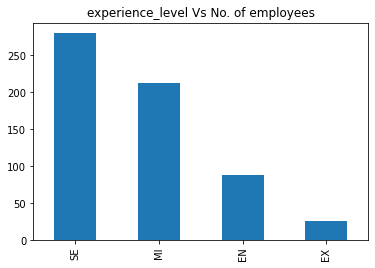

In [494]:
df['experience_level'].value_counts().plot(kind='bar')
plt.title('experience_level Vs No. of employees')
plt.show()

#### Inference: Most of the employee are working as Senior Executives and Executive level employee have least employees due to experience and knowledge 

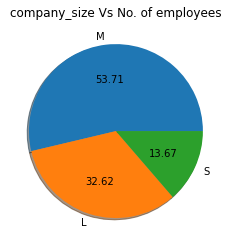

In [495]:
plt.pie(df['company_size'].value_counts(), autopct='%0.02f', labels=['M','L','S'], shadow=True)
plt.title('company_size Vs No. of employees')
plt.show()

#### Inference: We can see that 53.7% employee work for medium size companies and small size companies recruit only 13.7% candidates

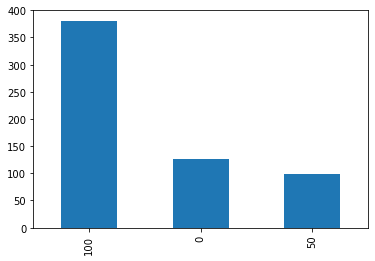

In [496]:
df['remote_ratio'].value_counts().plot(kind='bar')
plt.show()

#### Inference: Maximum employee work Completely remote(100) and partial, non-remote emplyee are very less incomparition 

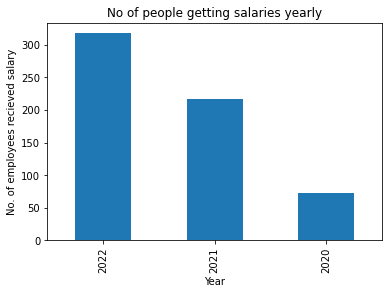

In [497]:
df['work_year'].value_counts().plot(kind='bar')
plt.title("No of people getting salaries yearly")
plt.xlabel('Year')
plt.ylabel('No. of employees recieved salary')
plt.show()

#### Inference: We can say that the employment in the data science field is increasing rapidly

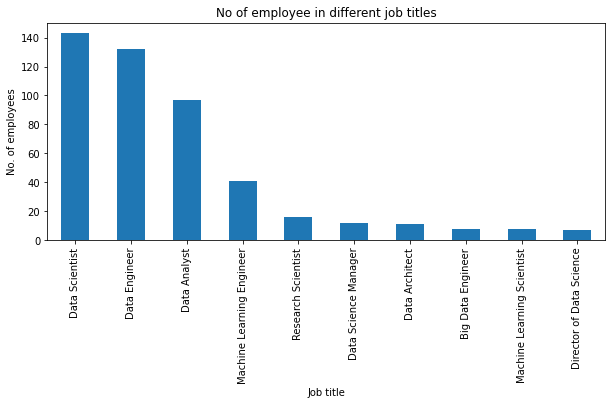

In [498]:
plt.figure(figsize=(10,4))
df['job_title'].value_counts().nlargest(10).plot(kind='bar')
plt.title('No of employee in different job titles')
plt.xlabel('Job title')
plt.ylabel('No. of employees')
plt.show()

#### Inference: Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineers employ most of the candidates

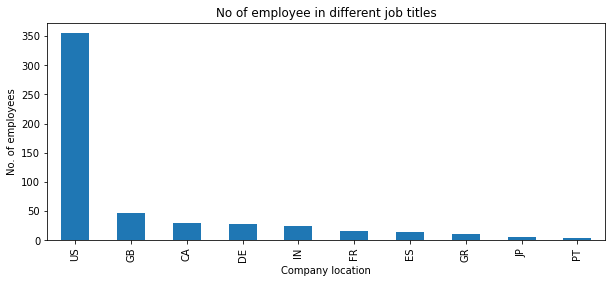

In [499]:
plt.figure(figsize=(10,4))
df['company_location'].value_counts().nlargest(10).plot(kind='bar')
plt.title('No of employee in different job titles')
plt.xlabel('Company location')
plt.ylabel('No. of employees')
plt.show()

#### Infernece: In the given data US provides the most employment.

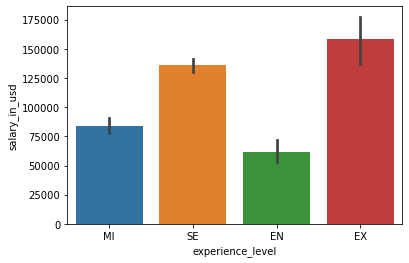

In [500]:
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()

#### Inference: In the above graph we can look at the average salary of its respective experience level

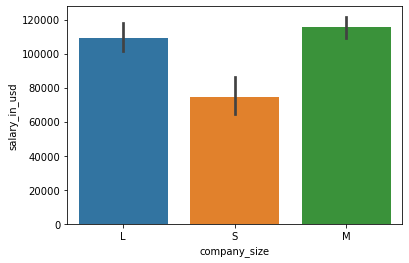

In [501]:
sns.barplot(x='company_size', y='salary_in_usd', data=df)
plt.show()

#### Inference: In the above graph we can look at the average salary of its respective company size

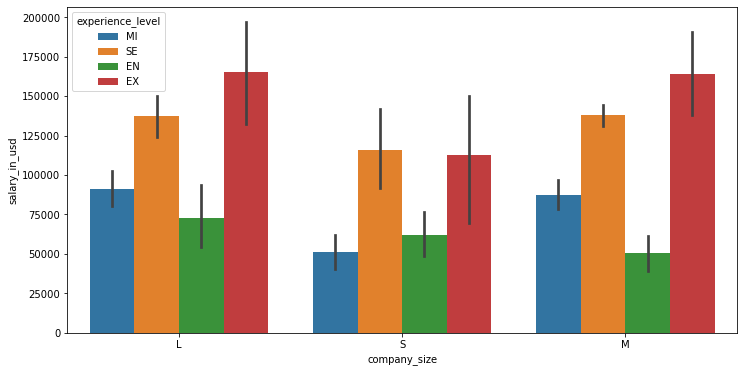

In [502]:
plt.figure(figsize=(12,6))
sns.barplot(x='company_size', y='salary_in_usd', hue='experience_level', data=df)
plt.show()

#### Inference: We can look at the average salaries offered by different size company to respective experience level candidates

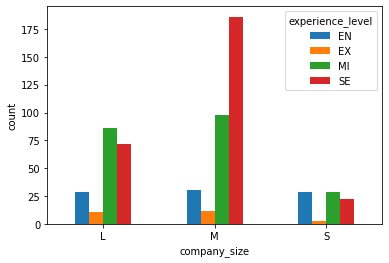

In [503]:
temp = df.groupby(['company_size']).experience_level.value_counts().unstack()
temp.plot(kind='bar',rot=0)
plt.ylabel('count')
plt.show()

#### Inference: Above graph shows No. of employees working in different size companies w.r.t their experience level

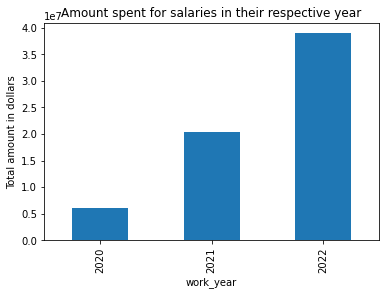

In [504]:
df.groupby(['work_year']).salary_in_usd.sum().plot(kind='bar')
plt.title('Amount spent for salaries in their respective year')
plt.ylabel('Total amount in dollars')
plt.show()

#### Inference: The amount spent for employees has increased from 6 million dollars to 39 million dollars from the year 2020 to 2022

# Feature Engineering

### adding small values and making a seperate type as others to reduce complications

In [505]:
temp = df['employee_residence'].value_counts().nsmallest(47).keys().tolist()
en_df['employee_residence']=pd.DataFrame(np.where(df['employee_residence'].isin(temp),'others',df['employee_residence']))
print(en_df['employee_residence'].value_counts())
print('----------------------------------------------------------')

temp = df['company_location'].value_counts().nsmallest(40).keys().tolist()
en_df['company_location']=pd.DataFrame(np.where(df['company_location'].isin(temp),'others',df['company_location']))
print(en_df['company_location'].value_counts())
print('----------------------------------------------------------')

temp = df['job_title'].value_counts().nsmallest(40).keys().tolist()
en_df['job_title']=pd.DataFrame(np.where(df['job_title'].isin(temp),'others',df['job_title']))
en_df['job_title'].value_counts()

US        332
others     88
GB         44
IN         30
CA         29
DE         25
FR         18
ES         15
GR         13
JP          7
PK          6
Name: employee_residence, dtype: int64
----------------------------------------------------------
US        355
others     73
GB         47
CA         30
DE         28
IN         24
FR         15
ES         14
GR         11
JP          6
NL          4
Name: company_location, dtype: int64
----------------------------------------------------------


Data Scientist                143
others                        132
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Data Science Consultant         7
Name: job_title, dtype: int64

In [506]:
en_cat_cols = en_df.select_dtypes(include = 'object').columns

In [507]:
for i in en_cat_cols:
    print(i)
    print(en_df[i].value_counts())
    print()

job_title
Data Scientist                143
others                        132
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Data Science Consultant         7
Name: job_title, dtype: int64

employee_residence
US        332
others     88
GB         44
IN         30
CA         29
DE         25
FR         18
ES         15
GR         13
JP          7
PK          6
Name: employee_residence, dtype: int64

company_location
US        355
others     73
GB         47
CA         30
DE         28
IN         24
FR         15
ES         14
GR         11
JP          6
NL          4
Name: company_location, dtype: int64



In [508]:
from sklearn.preprocessing import LabelEncoder
for i in en_cat_cols:
    label_encoding=LabelEncoder()
    en_df[i]=label_encoding.fit_transform(en_df[i])

In [509]:
for i in en_cat_cols:
    print(i)
    print(en_df[i].value_counts())
    print()

job_title
6     143
10    132
3     132
1      97
7      41
9      16
5      12
2      11
8       8
0       8
4       7
Name: job_title, dtype: int64

employee_residence
9     332
10     88
4      44
6      30
0      29
1      25
3      18
2      15
5      13
7       7
8       6
Name: employee_residence, dtype: int64

company_location
9     355
10     73
4      47
0      30
1      28
6      24
3      15
2      14
5      11
7       6
8       4
Name: company_location, dtype: int64



In [510]:
from sklearn.model_selection import train_test_split
inputs=en_df.drop('salary_in_usd',axis=1)
outputs=en_df['salary_in_usd']
x_train,x_test,y_train,y_test = train_test_split(inputs,outputs, test_size =0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((485, 7), (122, 7), (485,), (122,))

In [511]:
x_train.corr()

,work_year,experience_level,job_title,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.277064,-0.248598,0.067211,0.064098,0.062272,-0.114427
experience_level,0.277064,1.000000,0.035647,0.117921,0.049182,0.123207,0.065400
job_title,-0.248598,0.035647,1.000000,-0.034173,-0.067950,-0.028862,0.082351
employee_residence,0.067211,0.117921,-0.034173,1.000000,0.058731,0.878639,-0.013337
remote_ratio,0.064098,0.049182,-0.067950,0.058731,1.000000,0.046161,-0.058827
company_location,0.062272,0.123207,-0.028862,0.878639,0.046161,1.000000,-0.011968
company_size,-0.114427,0.065400,0.082351,-0.013337,-0.058827,-0.011968,1.000000


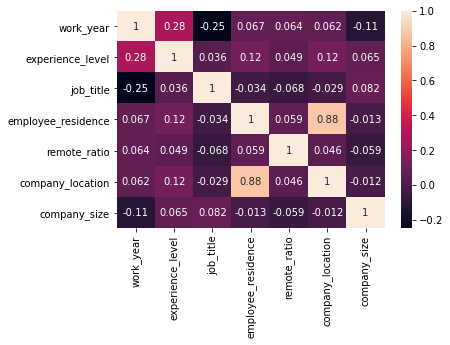

In [512]:
sns.heatmap(x_train.corr(), annot=True)
plt.show()

#### Inference: We can drop employee_residence column w.r.t to  threshold being 0.8.

In [513]:
print(en_df.shape)
en_df.drop('employee_residence', axis=1, inplace=True)
en_df.shape

(607, 8)


(607, 7)

# Model building

In [514]:
models=['Linear Regression','Lasso','Ridge']
r2_scoree=[]
MeanAbsoluteErrors=[]
MeanSquareErrors=[]
RootMeanSquareErrors=[]

In [515]:
def MeanAbsoluteError(prediction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result']=abs(new_df['prediction'] - new_df['y_test'])
    return new_df['result'].sum()/len(new_df['result'])

In [516]:
def MeanSquareError(perdiction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result'] = (new_df['prediction'] - new_df['y_test'])**2
    return new_df['result'].sum()/len(new_df['result'])

In [517]:
def RootMeanSquareError(perdiction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result'] = (new_df['prediction'] - new_df['y_test'])**2
    return (new_df['result'].sum()/len(new_df['result']))**0.5

In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

In [519]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [545]:
from sklearn.linear_model import Lasso
La = Lasso()
La.fit(x_train,y_train)
prediction = La.predict(x_test)

In [546]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [548]:
from sklearn.linear_model import Ridge
Rg = Ridge()
Rg.fit(x_train,y_train)
prediction = Rg.predict(x_test)

In [549]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [550]:
r2_scoree, MeanAbsoluteErrors, MeanSquareErrors, RootMeanSquareErrors

([0.3274327419876092, 0.327441988190056, 0.32756660528798875],
 [37301.116790117725, 37300.97707175989, 37302.75494668245],
 [2539974719.547373, 2539939800.9274325, 2539469179.9232106],
 [50398.16186675237, 50397.81543804684, 50393.146160199314])

# Metrics

In [551]:
metric_df = pd.DataFrame({'models':models, 'r2_score':r2_scoree, 'MeanAbsoluteError':MeanAbsoluteErrors, 'MeanSquareError':MeanSquareErrors, 'RootMeanSquareErrors':RootMeanSquareErrors})
metric_df

,models,r2_score,MeanAbsoluteError,MeanSquareError,RootMeanSquareErrors
0,Linear Regression,0.327433,37301.116790,2.539975e+09,50398.161867
1,Lasso,0.327442,37300.977072,2.539940e+09,50397.815438
2,Ridge,0.327567,37302.754947,2.539469e+09,50393.146160


In [ ]:
# explain which model does it better 

# GridSearch CV

In [ ]:
# implement grid search for the best model, recommend best hyperparameters